<a href="https://colab.research.google.com/github/mykeleony/analise_descritiva_humor_do_dia_2022/blob/main/analise_descritiva_humor_do_dia_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise descritiva do dataset "Humor do dia"

O *dataset* "***dias***" representa a atividade de psicologia positiva conhecida como "**rastreamento de humor**", do inglês "*mood tracking*", que consiste em registrar o próprio humor em intervalos de tempo definidos. Nesse caso, o humor predominante foi registrado diariamente no ano de 2022 e podia assumir um dos seguintes valores:


- Feliz
- Triste
- Calmo
- Estressante
- Entediante
- Ok (normal)
- Cheio
- Cansativo

Além do humor, o *dataset* conta com variáveis que representam as informações da data das observações, como:

- Dia do mês
- Dia do ano
- Dia da semana
- Mês
- Ano



O presente projeto trata-se de uma análise descritiva do *dataset* "dias" (ou humor do dia) e possui o propósito de elucidar a visão geral dos dados e identificar tendências e padrões. Particularmente, o objetivo subjetivo desta iniciativa é aumentar o autoconhecimento da criadora dos *inputs* dos dados, minha linda namorada Débora.


---

O *input* dos dados foi realizado manualmente por meio de um programa em Java que agrupa cada entrada de humor no respectivo dia e gera um arquivo *CSV* com as informações ao utilizar a biblioteca OpenCsv. O código desse programa está disponível [aqui](https://github.com/mykeleony/analise_descritiva_humor_do_dia_2022).

O *hard input* foi necessário porque as informações estavam representadas graficamente (cada cor em uma célula da matriz de dia e mês representa um humor), e infelizmente ainda não tenho conhecimento suficiente para criar uma inteligência artificial que identifique o humor a partir da cor e da linha, pois ainda estou estudando o assunto.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colorcet as cc

dados = pd.read_csv("dias.csv")

print(dados.head())
print(dados.info())

    ANO DIADASEMANA  DIADOANO  DIADOMES       HUMOR      MES
0  2022    SATURDAY         1         1       FELIZ  JANUARY
1  2022      SUNDAY         2         2          OK  JANUARY
2  2022      MONDAY         3         3  ENTEDIANTE  JANUARY
3  2022     TUESDAY         4         4          OK  JANUARY
4  2022   WEDNESDAY         5         5       CHEIO  JANUARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ANO          365 non-null    int64 
 1   DIADASEMANA  365 non-null    object
 2   DIADOANO     365 non-null    int64 
 3   DIADOMES     365 non-null    int64 
 4   HUMOR        365 non-null    object
 5   MES          365 non-null    object
dtypes: int64(3), object(3)
memory usage: 17.2+ KB
None


É possível observar que não existem valores nulos no *dataset*, o que já era esperado ao notar que existem 365 observações (total de dias de um ano não bissexto, que é o caso de 2022).

Como as estatísticas básicas como médias e desvios padrão não são relevantes pelo fato de as variáveis quantitativas representarem apenas informações de data, partiremos direto para a Análise Exploratória de Dados (EDA) da variável humor (as demais variáveis qualitativas também representam informações de data).

## Gráfico de barras da variável "Humor"

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

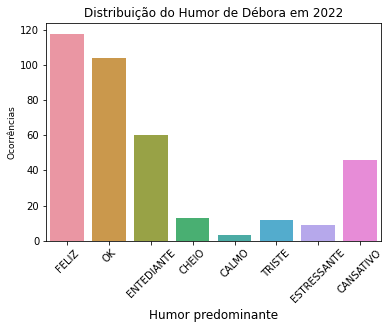

In [15]:
sns.set_palette('Purples')

sns.countplot(data=dados, x='HUMOR')
plt.title('Distribuição do Humor de Débora em 2022')
plt.xlabel('Humor predominante', fontsize=12)
plt.ylabel('Ocorrências', fontsize=9)
plt.xticks(rotation=45)

Podemos notar que a esmagadora maioria dos dias foram felizes e normais. Particular e felizmente, dias felizes representam quase um terço do ano. Por outro lado, calmaria não foi o forte do 2022 de Débora, com a quantidade de dias cheios, cansativos, estressantes e entediantes tomando conta dos dias não tão felizes.

## Gráfico de pizza (setores) do humor 

Text(0.5, 1.0, 'Distribuição do Humor')

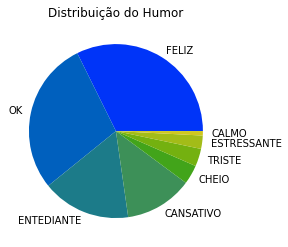

In [67]:
colors = [cc.rainbow[i*20] for i in range(len(frequencias))]
plt.pie(frequencias.values, labels=frequencias.index, colors=colors)
plt.title('Distribuição do Humor')

Esta é outra maneira de evidenciar a predominância de felicidade e normalidade no 2022 de Débora. Também é possível ter mais noção da dimensão do tédio e do cansaço, os quais também foram dominantes.

## Frequência cruzada entre humor e dia da semana

Text(0.5, 1.0, 'Frequência Cruzada Humor x Dia da Semana')

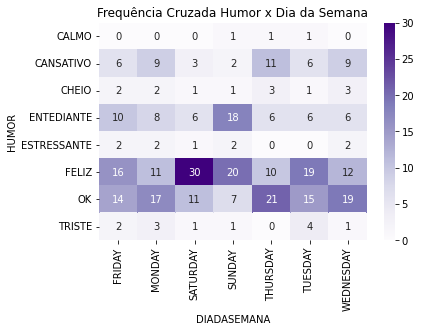

In [23]:
tabela = pd.crosstab(dados.HUMOR, dados.DIADASEMANA)
sns.heatmap(tabela, annot=True, cmap='Purples', fmt='g')
plt.title('Frequência Cruzada Humor x Dia da Semana')

Como a maioria dos brasileiros, Débora ficou feliz muito mais frequentemente em dias não úteis (sábado e domingo), com esses dias representando 42% dos dias felizes. Se incluirmos sexta-feira, a proporção sobe para 55%.

Por outro lado, em concordância com a minha convicção de domingo ser o dia mais chato da semana, muitos domingos foram entediantes ou normais, sem nada de muito interessante. Tédio e normalidade comporam 48% dos domingos de Débora.

Ademais, o dia útil que mais concentrou dias felizes foi terça-feira, e o motivo exige um pouco de contexto: Débora fez diversos cursos na área de Medicina Veterinária, sua vocação, e a maioria dos dias letivos caíram na terça-feira. Faz sentindo trabalhar com o que gosta, né?

## Frequência cruzada entre humor e mês

Text(0.5, 1.0, 'Humor x Mês')

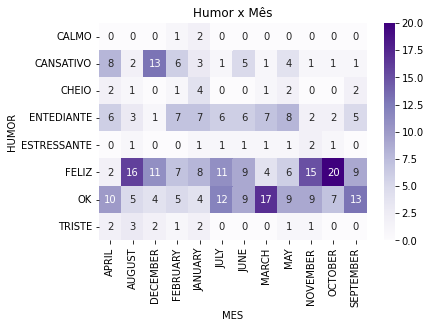

In [25]:
tabela = pd.crosstab(dados.HUMOR, dados.MES)
sns.heatmap(tabela, annot=True, cmap='Purples', fmt='g')
plt.title('Humor x Mês')

- Começando pela felicidade, é possível perceber que a maior parte dos dias felizes se concentrou no fim do ano, principalmente em agosto, outubro e novembro. (inserir motivo aqui)

- Por outro lado, o tédio não poupou esforços e se espalhou pelo ano inteiro, porém com dezembro sendo o mês menos tedioso do ano.

- Outro ponto interessante está presente nos dias cansativos: quase um terço deles (27,3%) está no mês de dezembro, que foi o mês em que Débora foi contratada para uma função exaustiva em uma empresa. A outra concentração de dias cansativos está em abril, o qual, de acordo com a própria, foi um mês de estudos intensos.

- Para fins de referência, eu a conheci em março. Não há dias tristes nem calmos nesse mês. Tire suas próprias conclusões.

## Boxplot dos dias pelo humor

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

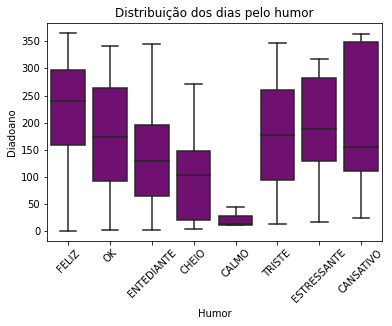

In [27]:
sns.boxplot(x=dados.HUMOR, y=dados.DIADOANO, color='purple')
plt.title('Distribuição dos dias pelo humor')
plt.xlabel('Humor')
plt.ylabel('Diadoano')
plt.xticks(rotation=45)


Note que dias cansativos tendem muito a um lado, evidenciando novamente a sua concentração em certos períodos do ano. Dias normais, tristes e entediantes são os mais bem distribuídos pelo ano, podendo indicar uma saúde mental aparentemente saudável em 2022.

## Conclusões

Uma análise descritiva do dataset "dias" mostrou que ele contém informações sobre o ano, dia do ano, dia do mês, dia da semana e humor de cada dia. Através de estatísticas básicas, como médias, desvios padrão, frequências e proporções, foi possível obter uma visão geral dos dados e identificar tendências e padrões.

Além disso, utilizando gráficos e visualizações, foi possível explorar mais detalhadamente as relações entre as variáveis e identificar suas distribuições e tendências. Por exemplo, foi possível verificar que felicidade é a sensação diária mais comum e que há uma tendência de ocorrer em fins de semana, assim como foi observado que a tristeza foi mais frequente no início do ano.

Porém, essa é apenas uma análise descritiva dos dados outras análises fazem-se necessárias para aprofundamento, como análises multivariadas inferenciais para obter uma compreensão em completude dos dados e verificar hipóteses mais específicas.